# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Spotify's revenue streams come for the most part from the monthly payments done by its subscribers. Spotify's customers don't churn and continue to paying the monthly subscription only if they are satisfied by the service and, in particular, if the time spent on the platform justifies the expenditure. It is the interest of Spotity that its user will receive stimuli to spend more time with satisfaction on the platform.

### **The objective:**

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

### **The key questions:**

- Which kind of approach can we follow to propose the users the songs that most probably match their preferences?
- Which kind of data can we rely on in solving this issue?
- Which kind of algorithms can be used and which of them offers the best performances?


### **The problem formulation**:

- We want to to prepare for each listener a list of the 10 songs that they most probably will like.
- We will do it firstly exploring the data and understanding which kind of data are available, applying univariate and multivariate statistics and correlation.
- Later, we can try to understand a bit better the customers tastes adopting most advanced approaches, using PCA and Clustering, identifying the most relevant features and discovering relavant parameters.
- Then, we will find an algorithm to manage cold start, when we do not have enough data about customer and/or product to offer personalized suggestions.
- Finally, we will test several different algorithms - like as collaborative filtering, matrix factorization, content based algorithm - to offering personalized suggestions. 

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings                                 
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error 

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIT_Course/Capstone project/count_data.csv")
song_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIT_Course/Capstone project/song_data.csv")

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
count_df.sample(10)

,Unnamed: 0,user_id,song_id,play_count
488921,488921,9aa2dadb1bd56c79a96157aac2b5cc9a0af509e5,SOBWKJK12AB017E055,1
1760544,1760544,f57e3f1eb813238397a91688ed3dc3cfe60eff7e,SOHVEID12AC960A131,1
1762162,1762162,7452bd1add2df2c8386eb8884bf0e3a0fb978be8,SOSWLPN12A67AE0DFD,3
897753,897753,8d8fff4fd823cf433f4533b5c70bb61eacb16f3f,SOCEMSF12A8C145464,2
516144,516144,05140c6d917d5862e90a72fe1a4778c736279153,SOYIPFY12A8C13AF8C,1
542545,542545,a466f29ef4804c541685eceda7823881cf4e9b98,SOVLNXV12A6D4F706E,1
601583,601583,10e1a09dab01e2ce60066f7b31d5db95c0f6f451,SODNVPY12A8C139254,2
1396346,1396346,c31858a3f9849d84e5a72e2a82cdd9e09b3d2920,SOCKFVF12A8C1442A7,2
1143625,1143625,7290b12824629b7476ad930783ad537a05a879e9,SOGODAC12A8C1353C0,3
467760,467760,31c7967f4daad47d973eb1fa7e196f8eb50f1bbd,SOYIEGB12A6D4F8C07,6


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
count_df.isnull().sum() #double-check the number of null values in each column

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
song_df.isnull().sum() #count the number of null values

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

#### **Observations and Insights:Datasets**
**count_df**
- The dataframe count_df contains 2 millions of entries and 4 columns.
- The column "Unnamed: 0" is integer type and represents the recording of the order of entries and it can be dropped, providing that that role is played by index.
- The columns "user_id" and "song_id" are object, whereas the column "play_count" is correctly an integer.
- There are no missing values in the dataframe

</br>

------ ------- 

</br>

**song_df**

- The dataframe song_df contains 1 millions of entries (rows) and 5 columns
- There is the song_id, containing the unique identifier of the songs, the title of the song in column "title", the "release" with the name of the album, the "artist_name" and the "year" of release.
- All the columns are object, but the year of release which is integer
- There are 5 missing values in the column "release" and 15 missing values in the column "title"

</br>

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df=df.drop(labels="Unnamed: 0", axis=1)

## Name the obtained dataframe as "df"
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

If a column is encrypted it cannot be encoded into numeric feature, as it is then impossible to decode it to its original value. There are other techniques that can be used, like as tokenization or hashing.

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder #importing from sklearn.preprocessing the label encoder
le = LabelEncoder() #creation of a label encoder object
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

#Exploration of the original total dataset

In [ ]:
df.head() #let's review the new dataframe with the encoded user_id and song_id to make possible to apply surprise function on them


,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Additional exploration: how many songs have been played the most and the least in the original dataset?
songs_played_chart_total = df.groupby(["title", "artist_name"])["play_count"].sum().sort_values(ascending=False)

most_listened_songs_total=songs_played_chart_total.head(10)
print("The list of the 10 songs listened the largest number of times")
print(most_listened_songs_total)

print("------"*10)
print("------"*10)

least_listened_songs_total=songs_played_chart_total.tail(10)
print("The list of the 10 songs listened the smallest number of times")
print(least_listened_songs_total)


The list of the 10 songs listened the largest number of times
title                                                                artist_name                                                           
You're The One                                                       Dwight Yoakam                                                             54136
Undo                                                                 Björk                                                                     49253
Revelry                                                              Kings Of Leon                                                             41418
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)  Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner    31153
Sehr kosmisch                                                        Harmonia                                                                  31036
Dog Days Are Over (Radio Edit)                       

In [ ]:
#How many different songs have listened to the users?

user_usage=df.groupby("user_id").size() # it gets the number of rows, so the number of different songs listened by a user
user_usage_df=pd.DataFrame(user_usage).reset_index()

user_usage_df.rename(columns={0:"total_plays"}, inplace=True)
user_usage_df = user_usage_df.sort_values(by="total_plays", ascending= False)

print("Top listeners")
print(user_usage_df.head(10))

print("------"*10)
print("------"*10)

print("The most casual listeners")
print(user_usage_df.tail(10))

Top listeners
       user_id  total_plays
32542    32542          711
75144    75144          643
23297    23297          556
10807    10807          540
7834      7834          533
52662    52662          523
6480      6480          522
48273    48273          502
61472    61472          489
31704    31704          487
------------------------------------------------------------
------------------------------------------------------------
The most casual listeners
       user_id  total_plays
58165    58165            1
4941      4941            1
48289    48289            1
48294    48294            1
9938      9938            1
4929      4929            1
40445    40445            1
19698    19698            1
40417    40417            1
56932    56932            1


In [ ]:
# Exploration of the user habits
user_usage_df.describe()

,user_id,total_plays
count,76353.000000,76353.000000
mean,38176.000000,26.194125
std,22041.356889,31.625078
min,0.000000,1.000000
25%,19088.000000,9.000000
50%,38176.000000,16.000000
75%,57264.000000,31.000000
max,76352.000000,711.000000


The average user has listened 26 different songs, with a standard deviation of 31. The minimum number of different songs listened is 1 and the maximum is 711. 25% of users have listed less than 9 differnt songs, 50% less than 16 different songs and 75% less than 31 different songs.

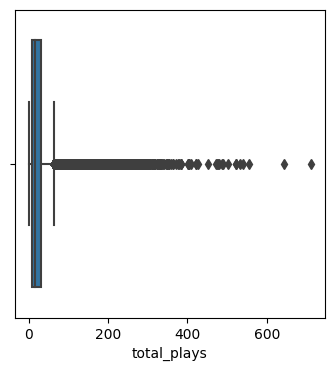

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data=user_usage_df, x="total_plays")
plt.show()

In [ ]:
# The number of users who listened only 1 song in their entire lifecycle
mono_song=user_usage_df[user_usage_df["total_plays"]==1].shape[0]
print(f"There are {mono_song} users who listened only 1 song")

There are 875 users who listened only 1 song


In [ ]:
#Manic users and songs
df.sort_values(by="play_count", ascending=False)

,user_id,song_id,play_count,title,release,artist_name,year
1228366,62305,1990,2213,Starshine,Gorillaz,Gorillaz,2000
1048310,24069,7839,920,Crack Under Pressure,Stress related / Live and learn,Righteous Pigs,1998
1586780,28243,4186,879,Call It Off (Album Version),The Con,Tegan And Sara,2007
31179,56007,9882,796,Paradise & Dreams,Skydivin',Darren Styles,0
1875121,57320,614,683,You're The One,If There Was A Way,Dwight Yoakam,1990
...,...,...,...,...,...,...,...
850079,70387,6953,1,The Power Of Love,Playlist: 80s Hits,Huey Lewis And The News,1985
850078,70387,6338,1,I Touch Myself,Divinyls,Divinyls,1990
850072,1886,9726,1,Love Dog,Dear Science_,TV On The Radio,2008
850071,1886,9695,1,Beautiful Life,A Night At The Roxbury,Ace of Base,1995


**Identification of Manic Listeners**
There is a user who listened "Starshine" by Gorillaz 2213 times. The second manic listeners listened to "Crack under pressure" by Righteous Pigs 920 times. The third is a listeners who listened "Call it off" by Tegan and Sara 879 times.

It is time to have a look at the distribution of number of plays.

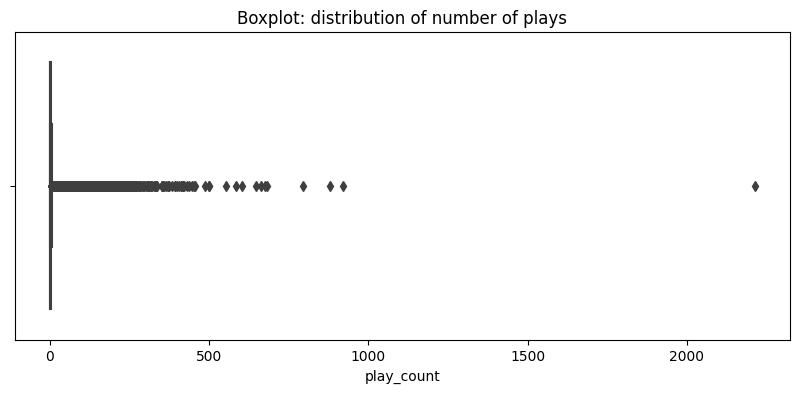

In [ ]:
# Visualization of distribution of number of plays
plt.figure(figsize=(10,4))

sns.boxplot(data=df, x="play_count")
plt.title("Boxplot: distribution of number of plays")


plt.show()

In [ ]:
# Statistics of number of plays
df.describe()

,user_id,song_id,play_count,year
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.813599e+04,4.978114e+03,3.045485e+00,1.628645e+03
std,2.204443e+04,2.890991e+03,6.579720e+00,7.787283e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.911200e+04,2.430000e+03,1.000000e+00,1.984000e+03
50%,3.794900e+04,5.038000e+03,1.000000e+00,2.002000e+03
75%,5.713500e+04,7.512000e+03,3.000000e+00,2.007000e+03
max,7.635200e+04,9.999000e+03,2.213000e+03,2.010000e+03


In [ ]:
# Explore how do people listened songs
# We want to see what are the frequency of number of plays for different users - songs couples

listening_habit=df.groupby("play_count")["song_id"].count()
listening_habit_df=pd.DataFrame(listening_habit).reset_index()
listening_habit_df.head()
listening_habit_df.rename(columns={"song_id": "frequency"}, inplace=True)
listening_habit_df = listening_habit_df.sort_values(by="frequency", ascending= False)

print(listening_habit_df.head())

   play_count  frequency
0           1    1138433
1           2     313043
2           3     142933
4           5      93136
3           4      82569


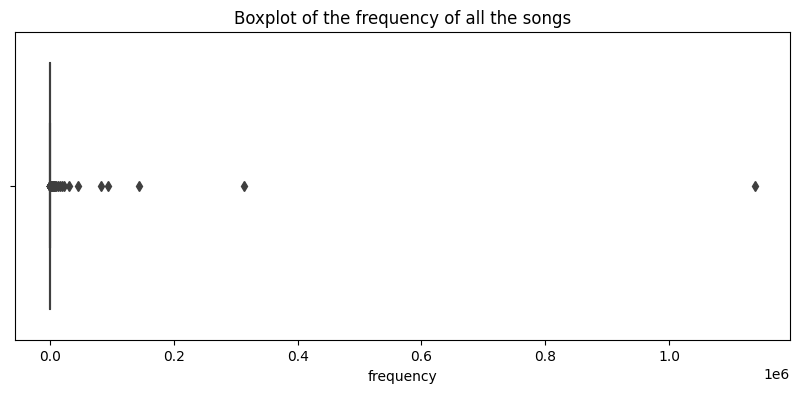

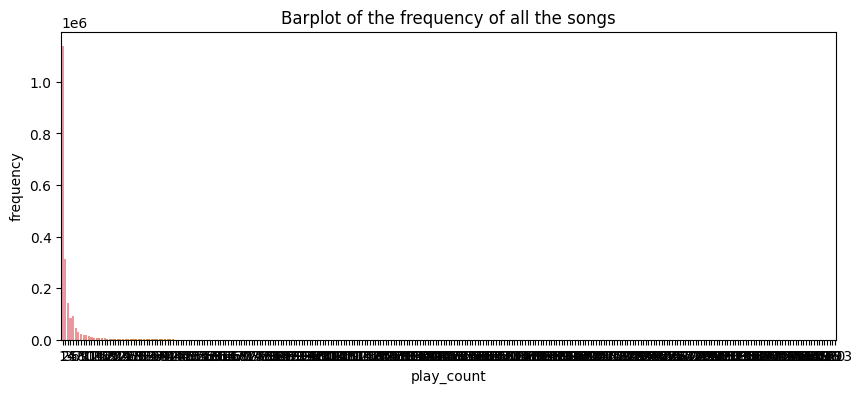

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Boxplot of the frequency of all the songs")
sns.boxplot(data=listening_habit_df, x="frequency")
plt.show()

plt.figure(figsize=(10,4))
plt.title("Barplot of the frequency of all the songs")
sns.barplot(data=listening_habit_df, x="play_count", y="frequency")
plt.show()


The variety of usage Boxplot and barplot visualize the distribution of variety of users: there is vast majority of users who listen to very few different songs; 75% of the users have listened less than 31 different songs. There are 875 users who listened only one song. At the same time there are also a lot of curious listeners who have listened hundreds of different songs.
The graphics are totally not readable due to the quantity of data and the high number of extreme values: the frequency of few play count is very high, whereas, high values are highly dispersed and have a very low frequency. 
This is why, to understand a bit better the the distribution we split the dataframe according with the frequency.

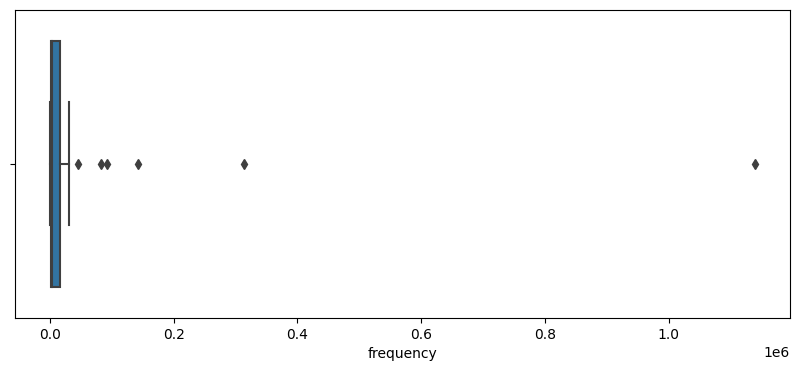

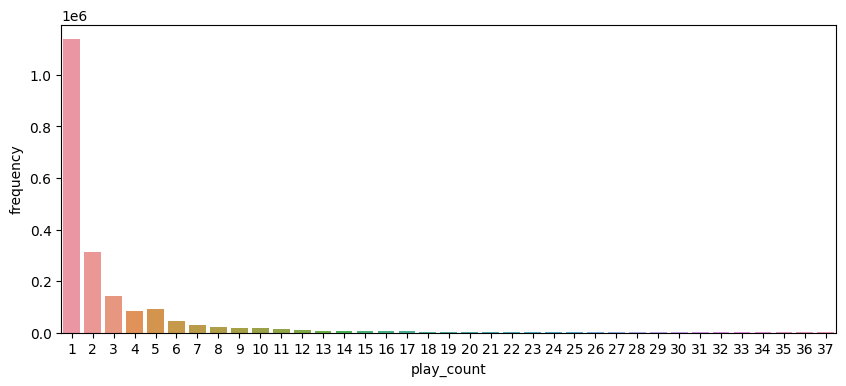

In [ ]:
# Let's filter the entries by the occurence of the number of plays keeping only the most frequent ones

freq_songs=listening_habit_df[listening_habit_df["frequency"]>500]

plt.figure(figsize=(10,4))
sns.boxplot(data=freq_songs, x="frequency")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(data=freq_songs, x="play_count", y="frequency")
plt.show()

**Observations**

---


We can see how frequent is a user that play a song only once, tw tiems, three times, and in general less than 5 times.

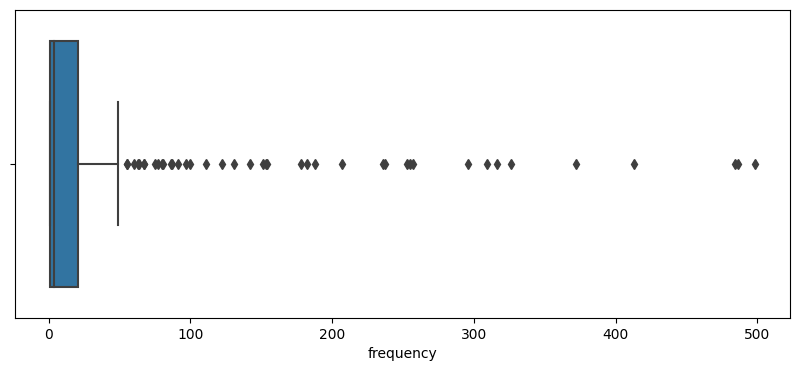

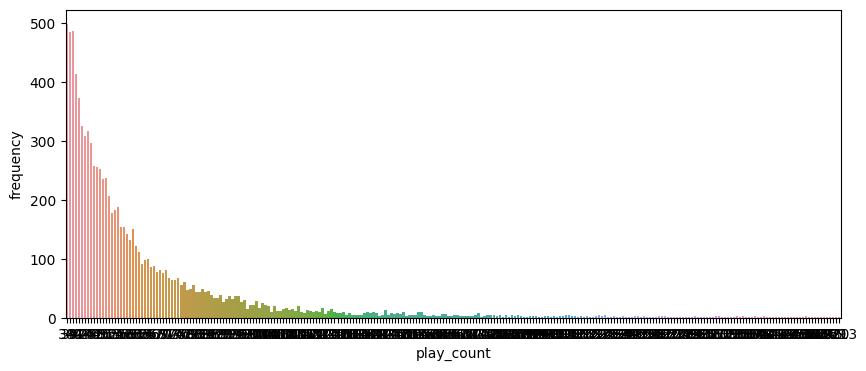

In [ ]:
# Let's filter the entries by the occurence of the number of plays keeping only the least frequent ones

unfreq_songs=listening_habit_df[listening_habit_df["frequency"]<=500]

plt.figure(figsize=(10,4))
sns.boxplot(data=unfreq_songs, x="frequency")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(data=unfreq_songs, x="play_count", y="frequency")
plt.show()

In [ ]:
# Calculating average play_count of the total of songs 
       # Hint: Use groupby function on the song_id column
average_count_total = df.groupby(["song_id", "title", "artist_name"]).mean()["play_count"]
average_count_total_df=pd.DataFrame(average_count_total)
average_count_ordered=average_count_total_df.sort_values(by="play_count", ascending=False)
average_count_ordered.rename(columns={"play_count": "average_num_play"}, inplace=True)
print("Average play_count total")
print(average_count_ordered)

print("--"*30)
print("--"*30)
print("--"*30)

# Calculating the frequency a song is played considering all the songs in the catalogue
      # Hint: Use groupby function on the song_id column
play_freq_total = df.groupby(["song_id", "title", "artist_name"]).count()["play_count"]
play_freq_total_df=pd.DataFrame(play_freq_total)
play_freq_ordered=play_freq_total_df.sort_values(by="play_count", ascending=False)
play_freq_ordered.rename(columns={"play_count": "occurence_number"}, inplace=True)

print("Play Frequency Total")
print(play_freq_ordered)

Average play_count total
                                                         average_num_play
song_id title                           artist_name                      
32      221                             keller williams         18.158228
1990    Starshine                       Gorillaz                16.891892
7839    Crack Under Pressure            Righteous Pigs          16.037500
9859    The Quest                       HYPOCRISY               15.976000
3859    Clara meets Slope - Hard To Say Clara Hill              15.171756
...                                                                   ...
8088    high fives                      Four Tet                 1.108108
7251    Slan Le Maige                   Reel Feelings            1.102941
3971    clouding                        Four Tet                 1.092308
2078    One Beat                        Sleater-kinney           1.082353
8993    Ribbons                         Four Tet                 1.061728

[10000 rows 

In [ ]:
frequency_mean_df=average_count_ordered.merge(play_freq_ordered["occurence_number"], on=["song_id", "title","artist_name"])
frequency_mean_df

,,,average_num_play,occurence_number
song_id,title,artist_name,,
32,221,keller williams,18.158228,158
1990,Starshine,Gorillaz,16.891892,148
7839,Crack Under Pressure,Righteous Pigs,16.037500,80
9859,The Quest,HYPOCRISY,15.976000,125
3859,Clara meets Slope - Hard To Say,Clara Hill,15.171756,262
...,...,...,...,...
8088,high fives,Four Tet,1.108108,74
7251,Slan Le Maige,Reel Feelings,1.102941,68
3971,clouding,Four Tet,1.092308,65


# Exploration of the Redux Database for Creating the Recommendation System

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


** The dataset final_df shape after removing entries **
After removing users who listened less than 90 different songs, songs listened by less than 120 users, and records with play_count bigger than 5, we remain with a dataset formed by 117,876 rows and 7 columns, surely more manageable than the original one with 2 millions of rows.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final["user_id"].nunique()

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final["song_id"].nunique()

563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final["artist_name"].nunique()

232

In [ ]:
# verify the distribution of play_count
df_final["play_count"].describe()

count    117876.000000
mean          1.700058
std           1.089517
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: play_count, dtype: float64

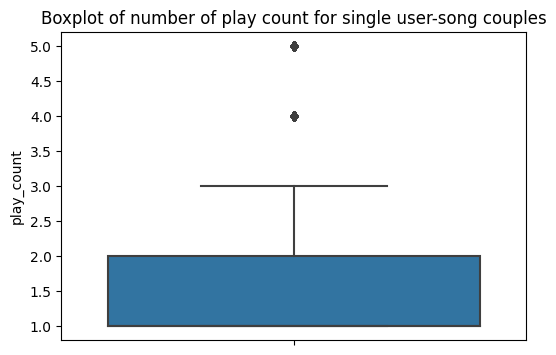

In [ ]:
# plot the boxplot of play_count
plt.figure(figsize=(6,4))
sns.boxplot(data=df_final, y="play_count")
plt.title("Boxplot of number of play count for single user-song couples")
plt.show()

In [ ]:
n_rows=df_final.shape[0]

for i in [1,2,3,4,5]:
  n_i = df_final[df_final["play_count"]==i].shape[0]
  freq_i = round((n_i/n_rows)*100,2)
  print(f"The frequency of songs played {i} times is {freq_i} %")

The frequency of songs played 1 times is 61.48 %
The frequency of songs played 2 times is 20.27 %
The frequency of songs played 3 times is 9.14 %
The frequency of songs played 4 times is 4.98 %
The frequency of songs played 5 times is 4.13 %


            song_id   perc
play_count                
1             72473  61.48
2             23890  20.27
3             10774   9.14
4              5874   4.98
5              4865   4.13


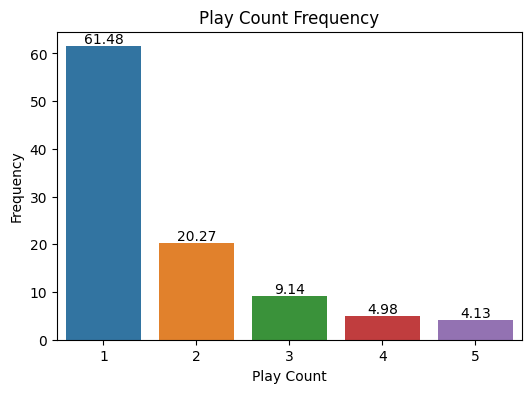

In [ ]:
distribution_count=df_final.groupby("play_count").count()["song_id"]
distribution_count_df=pd.DataFrame(distribution_count)
distribution_count_df["perc"]=round((distribution_count_df["song_id"]/n_rows)*100,2)
print(distribution_count_df)

plt.figure(figsize=(6,4))
ax=sns.barplot(data=distribution_count_df, y="perc", x=distribution_count_df.index, orient="v")
for i in ax.containers:
    ax.bar_label(i,) 
ax
plt.title("Play Count Frequency")
plt.ylabel("Frequency")
plt.xlabel("Play Count")
#plt.text(x = distribution_count_df["play_count"][0], y = distribution_count_df["song_id"][0]+1, s = distribution_count_df["perc"][0])
#plt.text(x = 0.98, y = tips_data.smoker.value_counts()[1]+1, s = tips_data.smoker.value_counts()[1])
plt.show()

### **Observations and Insights: Final Dataset **
</br>
The final dataset which has 117,876 rows and 7 columns contains the songs that have been listened by users. As seen, is a subset of the entire database, as it has been removed songs with less than 120 users listening to them and users who listened to less than 90 songs. And finally, the rows with more than 5 playes per user.
In this database, there are 3,155 unique users and 563 songs, meaning 1,776,265 possible combinations, if every user has listened to every song once. Instead there are only 117,876 combinations: in the matrix user-song, only 6,64% of the cells contain values. This is a sparse matrix, and one of the main issues will be to manage exactly this.

More than 61% of times a song is listened only once by a user.
Around 20% are listened twice.
This means that more than 80% of times a song is listened only once or twice by a user.

Only, 19% of times a song is listened 3 times or more. To be more precise:
- 9.14% 3 times
- 4.98% 4 times
- 4.13% 5 times

In [ ]:
#Exploration of artists most frequently played

artists_chart=df_final.groupby("artist_name")["artist_name"].count().reset_index(name="count").sort_values(by=["count"], ascending=False)
print("The most listened artists")
print(artists_chart.head(10))

print("----"*10)

print("The least listened artists")
print(artists_chart.tail(10))

The most listened artists
                artist_name  count
40                 Coldplay   5317
192             The Killers   4128
73   Florence + The Machine   2896
113           Kings Of Leon   2864
231    the bird and the bee   2387
114         LCD Soundsystem   2168
225         Vampire Weekend   2145
103           Justin Bieber   2130
145         Octopus Project   1825
178                 Soltero   1691
----------------------------------------
The least listened artists
                                 artist_name  count
215                              Tommy Sands    108
125                           Lynyrd Skynyrd    108
227                              White Denim    108
91                                  Interpol    107
146                                 Old 97's    107
205               The String Cheese Incident    107
95   Jadakiss / Swizz Beatz / OJ Da Juiceman    103
41                                  Colossal    102
184                                  Tavares     97
1

In [ ]:
#Exploration of albums most frequently played

release_chart=df_final.groupby(["release", "artist_name", "year"])["release"].count().reset_index(name="count").sort_values(by=["count"], ascending=False)
print("The most listened albums")
print(release_chart.head(10))

print("----"*10)

print("The least listened albums")
print(release_chart.tail(10))

The most listened albums
                              release             artist_name  year  count
365                   Vampire Weekend         Vampire Weekend  2007   1699
130                        Hell Train                 Soltero     0   1691
115                           Give Up          Postal Service  2003   1604
266  Ray Guns Are Not Just The Future    the bird and the bee  2009   1519
185                             Lungs  Florence + The Machine  2009   1511
213                         My Worlds           Justin Bieber  2010   1291
244                 Only By The Night           Kings Of Leon  2008   1198
28                     Battle Studies              John Mayer     0   1042
145             Identification Parade         Octopus Project  2002   1042
165                           Justice                 Justice     0    998
----------------------------------------
The least listened albums
                                        release  \
349                             

In [ ]:
#Exploration of songs most frequently played

songs_chart=df_final.groupby(["title", "artist_name", "release", "year"])["title"].count().reset_index(name="count").sort_values(by=["count"], ascending=False)
print("The most listened songs")
print(songs_chart.head(10))

print("----"*10)

print("The least listened songs")
print(songs_chart.tail(10))

The most listened songs
                              title             artist_name  \
512                    Use Somebody           Kings Of Leon   
105  Dog Days Are Over (Radio Edit)  Florence + The Machine   
393                   Sehr kosmisch                Harmonia   
80                           Clocks                Coldplay   
475                   The Scientist                Coldplay   
392                         Secrets             OneRepublic   
140                       Fireflies      Charttraxx Karaoke   
92                 Creep (Explicit)               Radiohead   
552                          Yellow                Coldplay   
186                Hey_ Soul Sister                   Train   

                                   release  year  count  
512                           Use Somebody  2008    751  
105       Now That's What I Call Music! 75     0    748  
393                     Musik von Harmonia     0    713  
80             A Rush Of Blood To The Head  2002  

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
#The total number of songs played
songs_played_total = df_final.play_count.sum()
print(f"The total number of songs played is: {songs_played_total}")


The total number of songs played is: 200396


In [ ]:
#The total number of times each songs has been played
most_played_songs = df_final.groupby(["title", "artist_name", "release", "year"])["play_count"].sum()
most_played_songs_df=pd.DataFrame(most_played_songs)
most_played_songs_df=most_played_songs_df.sort_values(by="play_count", ascending=False)
print(most_played_songs_df.head)
print(most_played_songs_df.tail)

<bound method NDFrame.head of                                                                                                     play_count
title                            artist_name            release                               year            
Dog Days Are Over (Radio Edit)   Florence + The Machine Now That's What I Call Music! 75      0           1634
Sehr kosmisch                    Harmonia               Musik von Harmonia                    0           1583
Use Somebody                     Kings Of Leon          Use Somebody                          2008        1463
Secrets                          OneRepublic            Waking Up                             2009        1427
Fireflies                        Charttraxx Karaoke     Karaoke Monthly Vol. 2 (January 2010) 2009        1291
...                                                                                                        ...
Phantom Part 1.5 (Album Version) Justice                A Cross The Universe      

In [ ]:
# Explore the original dataset to discover how many songs have been played mostly or less frequently

most_played_songs_df[most_played_songs_df["play_count"]==157].count()

play_count    2
dtype: int64

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
interacted_songs = df_final.groupby("song_id").size().sort_values(ascending=False)[:10]
interacted_songs

song_id
8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
dtype: int64

Most interacted users

In [ ]:
interacted_users = df_final.groupby("user_id").size().sort_values(ascending=False)[:10]
interacted_users

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
dtype: int64

#### **Observations and Insights: Most interacted users and songs**
The most interacted song has been played by 751 different users. The most interacted user has listened to 243 different songs.
In calculating the most interacted users and songs we haven't considered multiple plays done by the same user.

Songs played in a year

In [ ]:
# Find out the number of songs played in a year
  # Hint: # Hint: Use groupby function on the 'year' column

count_songs = df_final.groupby("year").count()["title"]
count_songs_df=pd.DataFrame(count_songs)
print(count_songs_df.head())

print("----"*10)


#dropping titles with year equals to zero and store in a new dataframe named "count_songs_red"
count_songs_red=count_songs_df.drop(count_songs_df.index[0])
print(count_songs_red.head())

      title
year       
0     20649
1969    238
1970    109
1971    133
1973    270
----------------------------------------
      title
year       
1969    238
1970    109
1971    133
1973    270
1974    583


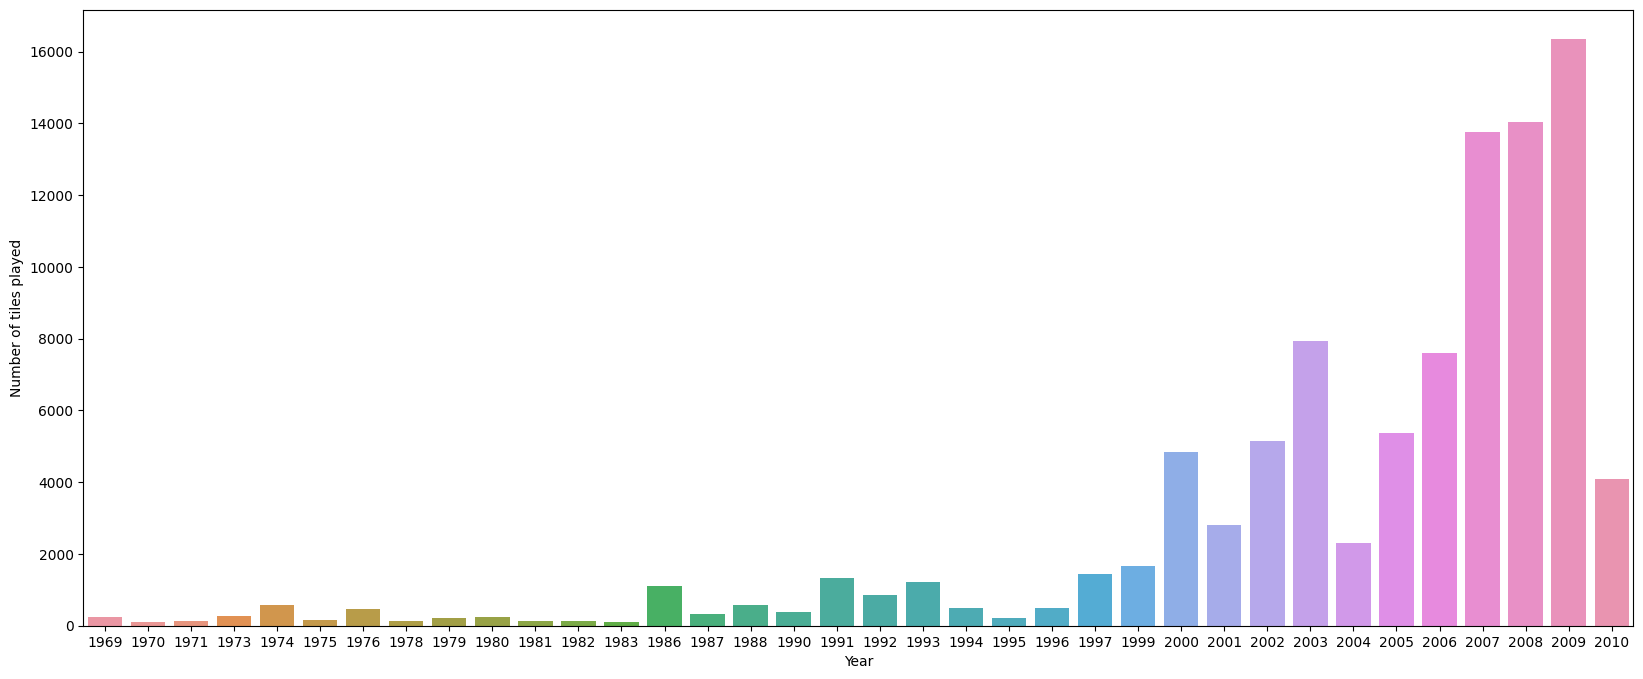

In [ ]:
# Set the figure size
plt.figure(figsize=(20,8))

# Create a barplot plot with y label as "number of titles played" and x -axis year
sns.barplot(x=count_songs_red.index, y="title", data=count_songs_red)

# Set the x label of the plot
plt.xlabel("Year")
# Set the y label of the plot
plt.ylabel("Number of tiles played")

# Show the plot
plt.show()

#### **Observations and Insights: Exploratory Analysis** # 
The exploration shows that there are many songs (more than 2K) without the year of release. The barplot shows that songs released during the 2000s decade has been played in general many more times than those published before 1999. Songs from 1986, 1991 and 1993 have been played more frequently than the other of their decades, suggesting that there could be some hits that have been played really many times.
The year 2001 and 2004, on the opposite, present much lower frequency that the others of the decade.
Since 2005, it seems to notice a trend of year over year increase, which seems to be interrupted in 2010, but possibly because at the moment of extraction of the results, the songs released that year didn't have enough times to be played many times.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Using exploratory data analysis, we could draw many more information. For example, keeping the original dataset, it could be interesting to discover:
- which songs have been played the most and least number of times 
- how many users have listed to only one song
- how many maniac listeners are there: listeners who have played a single song doze of times, and eventually with a low variety of songs

In general, we could also discover:
- who are the artists with the highest number of different songs played 
- who are the artists with the highest number of songs played
- what is the albums with the highest number of songs played
- what is the average number of times that a song is played, eventually excluding either those played only once (if too many) and thos played too many times by obsessive listeners.
- what did happen in years with a significativly different number of songs played respect with neighbors


Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
df_final.head() #let's review the structure of the dataframe analyzed


,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby("song_id").mean()["play_count"]
print("Average play_count")
print(average_count)

print("--"*30)
# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby("song_id").count()["play_count"]
print("Play Frequency")
print(play_freq)


Average play_count
song_id
21      1.622642
22      1.492424
52      1.729216
62      1.728070
93      1.452174
          ...   
9939    1.683983
9942    2.486667
9960    1.597122
9981    1.921053
9989    1.333333
Name: play_count, Length: 563, dtype: float64
------------------------------------------------------------
Play Frequency
song_id
21      265
22      132
52      421
62      114
93      115
       ... 
9939    231
9942    150
9960    139
9981    152
9989    120
Name: play_count, Length: 563, dtype: int64


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play=pd.DataFrame({"average_count": average_count, "play_freq" : play_freq})
# Let us see the first five records of the final_play dataset
final_play.head()

,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


In [ ]:
final_play.index

Int64Index([  21,   22,   52,   62,   93,   97,  118,  122,  134,  139,
            ...
            9767, 9771, 9847, 9913, 9931, 9939, 9942, 9960, 9981, 9989],
           dtype='int64', name='song_id', length=563)

Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(final_play, n, min_interactions):
  # finding the songs with a minimum frequency of play
  recommendations = final_play[final_play["play_freq"] > min_interactions]
  recommendations = recommendations.sort_values(by="average_count", ascending=False)
  return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
min_interactions=5 #define a minimum number of interactions
n=10 #define the number of recommendation we want to receive

# extract the song_id of the songs to suggest
top_n=top_n_songs(final_play, n=n, min_interactions=min_interactions) # the songs filtered by the recsys based on popularity

# filter the database of songs to extract the rows of the songs played most frequently
filtered_songs = df_final.loc[df_final["song_id"].isin(top_n)]

# selection of the a first entry of every song to get all the information regarding that song
# (artist, album, release date, etc.) and dropping infos related to the single user

sel_songs = filtered_songs.groupby("song_id").first().drop(["user_id", "play_count"], axis=1)

# create a dataframe to count the total number of plays of each of the songs selected
suggested_songs = pd.DataFrame(filtered_songs.groupby("song_id").sum()["play_count"])

# merge of the 2 dataframes and order the resulting dataframe by the number of plays
best_songs = pd.merge(sel_songs, suggested_songs, on="song_id")
print(best_songs.sort_values(by="play_count", ascending=False))


                               title  \
song_id                                
2220                   Sehr kosmisch   
5531                         Secrets   
614                   You're The One   
9942                     Greece 2000   
7224           Victoria (LP Version)   
657                        Luvstruck   
8483     Video Killed The Radio Star   
6450              Brave The Elements   
8324                 The Big Gundown   
5653                    Transparency   

                                            release         artist_name  year  \
song_id                                                                         
2220                             Musik von Harmonia            Harmonia     0   
5531                                      Waking Up         OneRepublic  2009   
614                              If There Was A Way       Dwight Yoakam  1990   
9942                                    Greece 2000        Three Drives  1997   
7224           Hit By A Train: Th

***Final Comments of Popularity-based Recommendation System***
The first recommendation system built is quite simple, but it is fundamental to manage the cold start issue and thus to suggested to new users, without any historical data, to receive suggestions.
These suggestions are purely based on the the frequency a song is built. The system consider firstly the average times a song is played by the users as a proxy of the evaluation (e.g.: if a song is played once  by a user it is considered as a low rating, whereas a song played 5 times by a user is considered as more appreciated. In addition, we have considered the frequency of occurence of songs: a song which is played by many different users have a higher appreciation.
Finally, the songs are ordered by the total number of plays and the songs most frequently played are suggested by the system.
This way, all the users receive exactly the same recommendations.

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195841 sha256=0003ad4a17a875e4ce7bb406e0a57f4652c2abb509bc91fd08b785275aae30cd
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering



### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

The main goal of the recommendation system is to make appealing and valid proposals to the new user entering the platform.

The predictor should distinguish between songs that are relevant and appreciated by the users and songs that are not relevant and not appreciated. 

Accuracy is the capability to make correct predictions, giving the same weight to false negative and false positive. 

Precision measure the capability of the system to propose relevant songs over the total of songs proposed.

Recall measure the capability of the system to propose the highest number of relevant songs among those relevant present in the catalogue.

In this case, I would consider the precision as the most useful metric, especially from the point of view of the customer experience: a system with a high precision propose a high percentage of relevant and interesting songs to the user over the number of songs proposed.


In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

In precision_recall_at_k, the higher the threshold the higher the precision of the recommendation. Precision measure the ratio between the number of relevant songs recommended over the songs that are predicted as relevant: if we are more strict in selection, we will have more chances to correctly predict relevant items.

On the opposite, the higher the threshold the lower the recall. Recall measures the ratio between the number of the songs predicted as relevant over the total number of actually relevant songs. Obviously, if we raise the threshold we are reducing the recall, as more relevant songs are filtered out.

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Instantiating Reader scale with expected rating scale 
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0,5)) # we consider a rating system with 6 levels, from 0 to 5

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split (data, test_size = 0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

The split between train and test datasets have an impact on the performances of the model. Tipically, a lower test_size is used when we have small datasets, with a limited number of entries. In fact, a system to be trained needs a sufficient amount of data. 

If we increase the ratio of the training set, the algorithm will learn better the patterns of data, but if we increase it too much, there is the risk of overfitting, lowering the performances on test set.

On the other hand, if we increase too much the ratio of test set, we have fewer data to train the model and, as a consequence, with run the risk not to capture the actual patterns hidden in the data and the algorithm could run risk of underfitting.


In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': "cosine",
               'user_based':True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1 
sim_user_user = KNNBasic(sim_options = sim_options, random_state =1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user, k = 30, threshold = 1.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:Baseline performances fo user_user model**
The results represent the baseline performances for my user_user recommendation system before tuning hyperparameters.
RMSE is slightly above 1, which means that as average the system predict 1 plays above or below the actual number of plays.
The precision is only 40%, which means that less and 1 out of 2 of the songs proposed as significant are actually significant (and thus played more than 1.5 times). The recall is around 70%, which means that the system is able to predict correctly 70% of totally relevant songs.
Finally, F_1 score demonstrate that a balanced correct result between Precision and Recall is reached in 50% of the attempts.

The most relevant aspect is the low precision of the system.

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id 

# To extract a casual one t-uple user-song-num_plays I use random

import random #import random to extract a random element from the list of testset
random.seed(42) # call random.seed to extract a fixed value 

sample_user = random.sample(testset, 1) #extract one sample from the testset to identify an existing couple user_id and song_id
print(f"The sample user song and value is: {sample_user}")

sample_user_id=sample_user[0][0]
print(f"The sample user id is: {sample_user_id}")

sample_song_id=sample_user[0][1]
print(f"The sample song id is: {sample_song_id}")

sample_num_plays=sample_user[0][2]
print(f"The sample number of plays is: {sample_num_plays}")


The sample user song and value is: [(61089, 8029, 4.0)]
The sample user id is: 61089
The sample song id is: 8029
The sample number of plays is: 4.0


The user with user_id equals to 61089 has played 4 times the song with song_id equals to 8029. We can now test whether the prediction system works, using r_ui=4

In [ ]:
#Prediction of the number of plays of a user in the test set 

sim_user_user.predict(61089, 8029, r_ui=4, verbose=True)

user: 61089      item: 8029       r_ui = 4.00   est = 2.32   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=61089, iid=8029, r_ui=4, est=2.3214343164954605, details={'actual_k': 40, 'was_impossible': False})

Comment. The recsys built predicted that the user 61089 would rate (listened to) song 8029 2.32 times, whereas the actual value is 4.

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

# I will use the same user but with a song not listened 

# firstly, I extract the songs listened by user selected with sample_user_id
listened_songs_id = np.array(df_final[df_final["user_id"] == sample_user_id].song_id.unique())

#extract one song sample
random.seed(12)
sample_song = random.sample(testset, 1) #extract one sample from the testset to identify an existing couple user_id and song_id
print(sample_song) # print a sample tuple extracted from testset 

sample_song_num = sample_song[0][1] # extract the song_id

# check if the song_id is present in the array of the songs listened by user selected
if sample_song_num not in listened_songs_id:
    sim_user_user.predict(sample_user_id, sample_song_num, verbose=True)
else: print("Select a different song")




[(54590, 9939, 1.0)]
user: 61089      item: 9939       r_ui = None   est = 1.52   {'actual_k': 40, 'was_impossible': False}


**Observations and Insights: Prediction**
In the case of the prediction for a listened song, we discover that our prediction is far from actual value of num_plays. These are the performances of the base model, we have no to tune the hyper-parameters and verify whether there are improvements.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0474814715690142
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


**Tuned parameters**
Through the lines of code above we have identified the best parameters for the KNNBasic user-user recsys.

In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights: Performances of KNNBasic after tuning hyperparameters**
To ease comparison, I report here the performances of the baseline model:
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504

The comparison between this optimized model and the baseline model suggests the following observations:

1. RMSE has slightly improved, going down from 1.08 to 1.05.
2. Precision is also slightly improved, going up from 39% to 41%
3. Recall has also increased performances, with a 72% instead of 69%.
4. Finally, F_1 score is also a bit better, from 50% to 52.5%.

Conclusion: the optimized model offers better performances than the baseline model.



In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

The prediction for user 6958 and item 1671 with actual rating (number of playes) equals to 2 is 1.96, with a minimal error.

In [ ]:
# I also want to make prediction for the user tested above with the baseline model, 
# using the following variables: user_id 61089, song_id: 8029; r_ui = 4
sim_user_user_optimized.predict(61089, 8029, r_ui=4, verbose = True)

user: 61089      item: 8029       r_ui = 4.00   est = 1.93   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=61089, iid=8029, r_ui=4, est=1.9324653036594468, details={'actual_k': 30, 'was_impossible': False})

**Observation**. The performances with this particular user are actually lower with the optimized model, as our prediction with baseline was closer to actual value.

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)

# Firstly, I extract the songs listened by user selected with sample_user_id
listened_songs_id_2 = np.array(df_final[df_final["user_id"] == 6958].song_id.unique())

#extract one song sample
random.seed(2)
sample_song_2 = random.sample(testset, 1) #extract one sample from the testset to identify an existing couple user_id and song_id
print(sample_song_2) # print a sample tuple extracted from testset 

sample_song_num_2 = sample_song_2[0][1] # extract the song_id

# check if the song_id is present in the array of the songs listened by user 6958
if sample_song_num_2 not in listened_songs_id_2:
    sim_user_user_optimized.predict(6958, sample_song_num_2, verbose=True)


[(30797, 8392, 3.0)]
user: 6958       item: 8392       r_ui = None   est = 1.14   {'actual_k': 13, 'was_impossible': False}


**Observations and Insights: Prediction after tuning hyperparameters**

After tuning the hyperparameters the performances seem to be better. When we checked on a song actually listened by the selected user, we predicted 1.96 when the actual number of plays is 2.

A note: when I tried with the same user - song tested on the baseline model, I got even a lower score. I will explore in the future release a bit more what happens with different types of users, for example verifying other users who actually played a song many times.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

Yes, we can identify the users that are more similar in term of the number of listened songs and related number of plays.

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)


[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
  
  # Creating an empty list to store the recommended songs ids
  recommendations = []
  
  # Creating an user song interactions matrix
  user_song_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')
  
  # Extracting those song ids which the user_id has not listened yet
  non_interacted_songs = user_song_interactions_matrix.loc[user_id][user_song_interactions_matrix.loc[user_id].isnull()].index.tolist()
  
  # Looping through each of the songs ids which user_id has not listened yet
  for item_id in non_interacted_songs:
    
    # Predicting the number of plays for those non listened songs
    est = algo.predict(user_id, item_id).est 
    
    # Appending the predicted ratings
    recommendations.append((item_id, est))
    
    # Sorting the predicted ratings in descending order
  recommendations.sort(key = lambda x: x[1], reverse = True)
  
  return recommendations[:top_n] # Returing top n highest predicted num plays songs for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
# Let's use one of the user extracted above: 6958
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)
recommendations

[(5531, 2.5533349782058683),
 (317, 2.518269003610337),
 (4954, 2.4067760718565427),
 (8635, 2.396605826987296),
 (5943, 2.39072300364337)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
recommendations_df = pd.DataFrame(recommendations, columns= ["song_id", "predicted_ratings"])
print(recommendations_df)

   song_id  predicted_ratings
0     5531           2.553335
1      317           2.518269
2     4954           2.406776
3     8635           2.396606
4     5943           2.390723


In [ ]:
# Discover what are the songs recommended listing also the artists, the release, the year of release

songs=recommendations_df.iloc[:,0]
recommended_songs=df_final[df_final["song_id"].isin(songs)]
print(recommended_songs.loc[:,["song_id", "title", "release", "artist_name", "year"]].drop_duplicates(subset="song_id"))

       song_id                title          release             artist_name  \
539       4954          The Maestro  Check Your Head            Beastie Boys   
1262      5943  You've Got The Love            Lungs  Florence + The Machine   
2016       317                 Undo  Vespertine Live                   Björk   
8756      5531              Secrets        Waking Up             OneRepublic   
54385     8635        Una Confusion       All Access                      LU   

       year  
539    1992  
1262   2009  
2016   2001  
8756   2009  
54385  2006  


**Observations and Insights: Ratings predicted**
The recsys predicts the number of times a user will listened to a song, based on what other users listened
 previously.

#Correcting the play_counts and Ranking the above songs#

In [ ]:
final_play.head() # let's review the structure of final_play dataframe

,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


In [ ]:
print(recommendations) # let's have a look to recommendations series

[(5531, 2.5533349782058683), (317, 2.518269003610337), (4954, 2.4067760718565427), (8635, 2.396605826987296), (5943, 2.39072300364337)]


In [ ]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts
  ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ["song_id", "predicted_ratings"]), on = "song_id", how="inner")

  # Rank the songs based on corrected play_counts
  ranked_songs["corrected_play_count"] = ranked_songs["predicted_ratings"] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs= ranked_songs.sort_values("corrected_play_count", ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

Yes, in theory, but in practice, since we have users who listened to a song 5 times and we consider this as the highest rating, for those, if we correct the rating, we get over the highest possible value.

In [ ]:
# Applying the ranking_songs function on the final_play data
rec_corrected=ranking_songs(recommendations, final_play)
rec_corrected

,song_id,play_freq,predicted_ratings,corrected_play_count
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


In [ ]:
songs_corrected=rec_corrected.iloc[:,0]
recommended_songs_corrected=df_final[df_final["song_id"].isin(songs_corrected)]
print(recommended_songs_corrected.loc[:,["song_id", "title", "release", "artist_name", "year"]].drop_duplicates(subset="song_id"))

       song_id                title          release             artist_name  \
539       4954          The Maestro  Check Your Head            Beastie Boys   
1262      5943  You've Got The Love            Lungs  Florence + The Machine   
2016       317                 Undo  Vespertine Live                   Björk   
8756      5531              Secrets        Waking Up             OneRepublic   
54385     8635        Una Confusion       All Access                      LU   

       year  
539    1992  
1262   2009  
2016   2001  
8756   2009  
54385  2006  


**Observations and Insights:Corrected Ranlking for Collaborative User User recommendation system**

The corrected play_count takes into account the number of times the songs are played by different users.

It has been empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the number of times it has been seen by users.

### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Build the default item-item-similarity model
sim_options = {'name': "cosine",
               'user_based':False}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1 
sim_item_item = KNNBasic(sim_options = sim_options, random_state =1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_item_item, k = 30, threshold = 1.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights: Baseline performances of the item - item recommendation system **

The item-item recsys has a RMSE equals to 1.03, precision of 30% and recall of 56%. F_1 score is just below 40%.

Comparing it to the baseline performances of user-user recsys, we can say that the performances seem a bit lower, even if the RMSE is smaller in this case, as  Precision is 30% (it was 39,6% in user-user), Recall 56% (it was 69%) and F_1_score is 39% (it was 50% in user-user).


In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user

#firstly verify that the song with song_id = 1671 has been listened by the user with user_id 6958
listened_by_user=df_final[df_final["user_id"] == 6958]["song_id"]

if 1671 in list(listened_by_user):
  print("The user with user_id = 6958 has listened the song with song_id = 1671. It is ok, go ahead with prediction")
  r_ui = int(df_final[(df_final["user_id"] == 6958) & (df_final["song_id"]==1671)]["play_count"])
else:
  print("The user with user_id = 6958 hasn't listened to the song with song_id = 1671. Choose another song!")

sim_item_item.predict(6958, 1671, r_ui=r_ui, verbose=True)



The user with user_id = 6958 has listened the song with song_id = 1671. It is ok, go ahead with prediction
user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

# identify the user_id of the listeners of the song with song_id = 1671
listeners = df_final[df_final["song_id"] == 1671]["user_id"].unique()

random.seed(12) #extract always the same user every iteration
sample_user_3 = random.sample(testset, 1) # get a sample from testset
print(sample_user_3) #print the sample to visualize the tuple

# if condition to verify whether the user is present or not in the list of song listeners.

if sample_user_3 not in listeners:
  sim_item_item.predict(sample_user_3[0][0], 1671, verbose=True)
else:
  print("Error")

[(54590, 9939, 1.0)]
user: 54590      item: 1671       r_ui = None   est = 1.04   {'actual_k': 20, 'was_impossible': False}


**Observations and Insights: Item-item collaborative filtering recsys**

The prediction for a user who listened a particular song give a result with an error lower than RMSE, having estimated 1.36, whereas the reality is 2.

This is the baseline model for item-item collaborative filtering recsys.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0219478463059115
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

We could check a wider variety of parameters' values.

In [ ]:
# Apply the best model found in the grid search
sim_options_2 = {'name': 'pearson_baseline', 
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options_2, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights: Optimized item-item recsys performances**
The new model has improved the perforamnces as showed by the main metrics:

RMSE slightly down from 1.0394 to 1.0328.
Precision up to 40,8% from 30,7%
Recall up to 66,5% from 56,2%
F_1_score up to 50,6% from 39,7%

Thi model beats the baseline model and can be retained.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)

print(df_final[(df_final["user_id"] == 6958) & (df_final["song_id"] == 1671)]) #show the dataframe line with selected song and user

# prediction
sim_item_item_optimized.predict(6958, 1671, r_ui= 2, verbose=True)

     user_id  song_id  play_count                title  release  \
215     6958     1671           2  Sleeping In (Album)  Give Up   

        artist_name  year  
215  Postal Service  2003  
user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user

listeners2 = df_final[df_final["song_id"] == 3232]["user_id"].unique() #listeners of song 3232

if 6958 not in listeners2:
  sim_item_item_optimized.predict(6958, 3232, verbose=True)
else:
  print("Error")

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


**Observations and Insights: Optimized item-item recsys performance**

The prediction for what user actually experienced with is positive, and there is no need 

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5) #


[124, 523, 173, 205, 65]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
random.seed(22)
sample_item_4 = random.sample(testset, 1)
recommendations_2 = get_recommendations(df_final, sample_item_4[0][0], 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommendations_2_df=pd.DataFrame(recommendations_2, columns=["song_id", "predicted_play_count"])
print(recommendations_2_df)

   song_id  predicted_play_count
0     3050              3.722351
1     9081              3.493600
2     1516              3.351275
3     3534              3.209863
4     8863              3.181066


In [ ]:
songs_2=recommendations_2_df.iloc[:,0]
recommended_songs_2=df_final[df_final["song_id"].isin(songs_2)]
print(recommended_songs_2.loc[:,["song_id", "title", "release", "artist_name", "year"]].drop_duplicates(subset="song_id"))

       song_id            title                release      artist_name  year
3988      1516  Some Unholy War  Frank & Back to Black    Amy Winehouse  2006
4955      3534  Who Let You Go?                Sawdust      The Killers  2007
11420     9081      Take Me Out            Take Me Out  Franz Ferdinand  2003
17049     3050    Terre Promise      77 Souter'1 Vol.2  O'Rosko Raricim     0
29896     8863          No Rain            Blind Melon      Blind Melon  1992


** Songs suggested **
As we can see the system suggests every time for a different user a different set of songs: this is why it is highly personalised.

In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations_2, final_play)

,song_id,play_freq,predicted_ratings,corrected_play_count
0,3050,233,3.722351,3.656839
4,9081,111,3.493600,3.398685
2,1516,140,3.351275,3.266760
1,3534,162,3.209863,3.131295
3,8863,117,3.181066,3.088616


**Observations and Insights:Collaborative filterning**
The performances offered by the different recsys are the following:

**User - user baseline**</br>
RMSE: 1.0878 </br>
Precision: 0.396 </br>
Recall: 0.692 </br>
F_1 score: 0.504 </br></br>

**User - user optimized** </br>
RMSE: 1.0521 </br>
Precision:  0.413 </br>
Recall:  0.721 </br>
F_1 score:  0.525 </br></br>

**Item - item baseline** </br>
RMSE: 1.0394 </br>
Precision:  0.307 </br>
Recall:  0.562 </br>
F_1 score:  0.397 </br></br>

**Item - Item optimized** </br>
RMSE: 1.0328 </br>
Precision:  0.408 </br>
Recall:  0.665 </br>
F_1 score:  0.506</br></br>

The best model is the optimized user-user collaborative filtering, which has a RMSE slightly higher than both item-item recsys, but it offers better Precision, Recall and F_1_score.

All other factors equal, I would chosse this model for my recsys.

The Precision is always lower than 50%, which remains the main weakness of this model.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid_3 = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid_3, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.0122368612897565
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Build the optimized SVD model using optimal hyperparameter search
svd_algo_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the train set
svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


**Observations and Insights:SVD baseline and optimized**

**Baselines SVD** </br>
RMSE: 1.0252 </br>
Precision:  0.41 </br>
Recall:  0.633 </br>
F_1 score:  0.498 </br>

**Optimized SVD** </br>
RMSE: 1.0141 </br>
Precision:  0.415 </br>
Recall:  0.635 </br>
F_1 score:  0.502 </br>

The 2 models offer very similar percormances: baseline model has a lower RMSE, but the optimized version has better Precision, Recall and F_1_score. As a consequence, I would use the optimized SVD.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_algo_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_algo_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights: Performances**
The 2 SVD recommendation models show very similar performances. The optimized one show slightly better performances and it should be preferred for this.
The prediction of the rating (number of plays) for the user with an actual of 2 plays is 1.34, which is much closer to the actual value than the prediction done with actual plays equals to 4.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_algo_optimized)
print(svd_recommendations)

[(7224, 2.601898709695318), (5653, 2.108727504933887), (8324, 2.014091144993034), (6450, 1.952492524218337), (9942, 1.9401146174388464)]


In [ ]:
# Ranking songs based on above recommendations
svd_recommendations_df = pd.DataFrame(svd_recommendations, columns = ['song_id', 'predicted_ratings']).sort_values(by="predicted_ratings", ascending=False)
svd_recommendations_df

,song_id,predicted_ratings
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115


In [ ]:
songs_svd = svd_recommendations_df.iloc[:,0]
recommended_songs_svd=df_final[df_final["song_id"].isin(songs_svd)]
print(recommended_songs_svd.loc[:,["song_id", "title", "release", "artist_name", "year"]].drop_duplicates(subset="song_id"))


       song_id                  title  \
8759      5653           Transparency   
12637     9942            Greece 2000   
24064     6450     Brave The Elements   
24098     7224  Victoria (LP Version)   
24163     8324        The Big Gundown   

                                          release   artist_name  year  
8759                              Workout Holiday   White Denim  2008  
12637                                 Greece 2000  Three Drives  1997  
24064                     Brave The Elements - EP      Colossal     0  
24098        Hit By A Train: The Best Of Old 97's      Old 97's  2006  
24163  Invaders Must Die Remixes and Bonus Tracks   The Prodigy  2009  


**Observations and Insights:Comparison of different models**

The best SVD Collaborative Filtering is the SVD Optimized:

**Optimized SVD** </br>
RMSE: 1.0141 </br>
Precision: 0.415 </br>
Recall: 0.635 </br>
F_1 score: 0.502 </br></br>

The best collaborative filtering model was the optimized item-item. I report here below its performances. It makes sense to compare the performances of these 2.

**User - user optimized** </br>
RMSE: 1.0521 </br>
Precision:  0.413 </br>
Recall:  0.721 </br>
F_1 score:  0.525 </br></br>


If we compare the performances, we see that the optimized user-user has the best performances. If we are not interested in discovering latent features, which it is possible with the SVD Factorization. 

# Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model

# Initialization using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0451410694716372
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 50}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 50, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:Comparing the 2 different versions of clustering-based recommendation systems**

**Baselines clustering-based recsys** </br>
RMSE: 1.0487 </br>
Precision:  0.397 </br>
Recall:  0.582 </br>
F_1 score:  0.472 </br>

**Optimized clustering-based recsys** </br>
RMSE: 1.0487 </br>
Precision:  0.397 </br>
Recall:  0.582 </br>
F_1 score:  0.472 </br></br>

The 2 systems show the same performances: 2 hyperparameters are equals to default values; in particular the number of item clusters and the number of user clusters. The only difference is the number of iterations (epochs paramater).

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Observations and Insights:Observation**
If we have to decide which recsys to compare, we have to compare the best system built so far (the optimized user -user collaborative filtering) with the clustering based recsys.

**Optimized clustering-based recsys** </br>
RMSE: 1.0487 </br>
Precision:  0.397 </br>
Recall:  0.582 </br>
F_1 score:  0.472 </br></br>

**User - user optimized collaborative filtering** </br>
RMSE: 1.0521 </br>
Precision: 0.413 </br>
Recall: 0.721 </br>
F_1 score: 0.525 </br></br>

The performances reported above shows clearly that the best system is the otimized user-user collaborative filtering, especially for what concern precision and above all the recall.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clust_tuned_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)
print(clust_tuned_recommendations)

[(7224, 3.0947973198294125), (8324, 2.3114984930523246), (9942, 2.2150393965932285), (5531, 2.1245632061170374), (4831, 2.1237828270757895)]


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
rec_song_clust=ranking_songs(clust_tuned_recommendations, final_play)
rec_song_clust

,song_id,play_freq,predicted_ratings,corrected_play_count
2,7224,107,3.094797,2.998124
4,8324,96,2.311498,2.209436
1,9942,150,2.215039,2.133390
0,5531,618,2.124563,2.084337
3,4831,97,2.123783,2.022248


In [ ]:
rec_song_clust_final=rec_song_clust.merge(df_final, on="song_id")
rec_song_clust_final

songs_clust = rec_song_clust.iloc[:,0]
recommended_songs_clust=df_final[df_final["song_id"].isin(songs_clust)]
print(recommended_songs_clust.loc[:,["song_id", "title", "release", "artist_name", "year"]].drop_duplicates(subset="song_id"))




       song_id                            title  \
2082      4831  Heaven Must Be Missing An Angel   
8756      5531                          Secrets   
12637     9942                      Greece 2000   
24098     7224            Victoria (LP Version)   
24163     8324                  The Big Gundown   

                                          release   artist_name  year  
2082            Capitol Gold: The Best Of Tavares       Tavares  1979  
8756                                    Waking Up   OneRepublic  2009  
12637                                 Greece 2000  Three Drives  1997  
24098        Hit By A Train: The Best Of Old 97's      Old 97's  2006  
24163  Invaders Must Die Remixes and Bonus Tracks   The Prodigy  2009  


**Observations and Insights:Corrected Play Count**
The user with user_id 6958 received the 5 suggestions showed above, for which the estimated number of plays ranges between 2 and 3.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

Yes, we can use artist, title, genre, album release, and eventually year of release. We can base our system partly on a new field text created concatenating artist, title, release and to explore whether there are patterns related with these additional features.
 

In [ ]:
df_small = df_final
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small["text"] = df_small["title"] + " " + df_small["release"] + " " + df_small["artist_name"]
print(df_small.head())

     user_id  song_id  play_count                            title  \
200     6958      447           1               Daisy And Prudence   
202     6958      512           1  The Ballad of Michael Valentine   
203     6958      549           1        I Stand Corrected (Album)   
204     6958      703           1            They Might Follow You   
205     6958      719           1                       Monkey Man   

                  release      artist_name  year  \
200          Distillation     Erin McKeown  2000   
202               Sawdust      The Killers  2004   
203       Vampire Weekend  Vampire Weekend  2007   
204           Tiny Vipers      Tiny Vipers  2007   
205  You Know I'm No Good    Amy Winehouse  2007   

                                                  text  
200       Daisy And Prudence Distillation Erin McKeown  
202  The Ballad of Michael Valentine Sawdust The Ki...  
203  I Stand Corrected (Album) Vampire Weekend Vamp...  
204      They Might Follow You Tiny Vi

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_selected = df_small.loc[ : , ["user_id", "song_id", "play_count", "title", "text"]]
print(df_selected.head())
print(df_selected.shape)

# Drop the duplicates from the title column
df_selected = df_selected.drop_duplicates(subset = ["title"])

# Set the title column as the index
df_selected.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
print(df_selected.head())
print(df_selected.shape)

     user_id  song_id  play_count                            title  \
200     6958      447           1               Daisy And Prudence   
202     6958      512           1  The Ballad of Michael Valentine   
203     6958      549           1        I Stand Corrected (Album)   
204     6958      703           1            They Might Follow You   
205     6958      719           1                       Monkey Man   

                                                  text  
200       Daisy And Prudence Distillation Erin McKeown  
202  The Ballad of Michael Valentine Sawdust The Ki...  
203  I Stand Corrected (Album) Vampire Weekend Vamp...  
204      They Might Follow You Tiny Vipers Tiny Vipers  
205      Monkey Man You Know I'm No Good Amy Winehouse  
(117876, 5)
                                 user_id  song_id  play_count  \
title                                                           
Daisy And Prudence                  6958      447           1   
The Ballad of Michael Valentin

In [ ]:
# Create the series of indices from the data
titles_series = pd.Series(df_selected.index)
print(titles_series)
print(type(titles_series))

0                   Daisy And Prudence
1      The Ballad of Michael Valentine
2            I Stand Corrected (Album)
3                They Might Follow You
4                           Monkey Man
                    ...               
556                       Tuesday Moon
557      Everything In Its Right Place
558                      The Last Song
559                      Paper Gangsta
560                          Starlight
Name: title, Length: 561, dtype: object
<class 'pandas.core.series.Series'>


In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet 
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text

def tokenize(text):
    
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    # Extracting each word in the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_selected['text'].values).toarray()

# Making the DataFrame of song_tfidf data
song_tfidf_df=pd.DataFrame(song_tfidf)

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
  
  recommended_songs = []
  indices = pd.Series(df_selected.index)

    # Getting the index of the song that matches the title
  idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
  score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
  top_10_indexes = list(score_series.iloc[1 : 11].index)
  
  print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
  for i in top_10_indexes:
    recommended_songs.append(list(df_selected.index)[i])
        
  return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
rec_content = recommendations(title="Learn To Fly", similar_songs=similar_songs)
rec_content_df=pd.DataFrame(rec_content)
rec_content=rec_content_df.rename(columns={0:"title"}, inplace=True)
rec_content_df

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


,title
0,Everlong
1,The Pretender
2,Nothing Better (Album)
3,From Left To Right
4,Lifespan Of A Fly
5,Under The Gun
6,I Need A Dollar
7,Feel The Love
8,All The Pretty Faces
9,Bones


In [ ]:
# Selecting and printing only the songs selected by the recommendation system for the song "Learn to Fly"
rec_songs_content=df_small[df_small["title"].isin(rec_content_df.loc[:, "title"])].drop_duplicates(subset="song_id")
rec_songs_content_redux=rec_songs_content.loc[:, ["song_id", "title", "release", "artist_name", "text", "year"]]
rec_songs_content_redux

,song_id,title,release,artist_name,text,year
1272,6525,The Pretender,Echoes_ Silence_ Patience & Grace,Foo Fighters,The Pretender Echoes_ Silence_ Patience & Grac...,2007
4278,4739,From Left To Right,Corymb,Boom Bip,From Left To Right Corymb Boom Bip,2003
4916,771,Under The Gun,Sawdust,The Killers,Under The Gun Sawdust The Killers,2004
4924,1674,I Need A Dollar,I Need A Dollar,Aloe Blacc,I Need A Dollar I Need A Dollar Aloe Blacc,2010
4931,1936,Feel The Love,In Ghost Colours,Cut Copy,Feel The Love In Ghost Colours Cut Copy,2008
4944,2716,All The Pretty Faces,When You Were Young,The Killers,All The Pretty Faces When You Were Young The ...,2006
4973,5095,Bones,Bones,The Killers,Bones Bones The Killers,2006
6680,3101,Lifespan Of A Fly,Ray Guns Are Not Just The Future,the bird and the bee,Lifespan Of A Fly Ray Guns Are Not Just The Fu...,2009
9355,1994,Nothing Better (Album),Give Up,Postal Service,Nothing Better (Album) Give Up Postal Service,2003
20010,9249,Everlong,The Colour And The Shape (Special Edition),Foo Fighters,Everlong The Colour And The Shape (Special Edi...,1992


In [ ]:
# print the text of "Learn to Fly"
df_final["text"][df_final["title"]=="Learn To Fly"].unique()

array(['Learn To Fly There Is Nothing Left To Lose Foo Fighters'],
      dtype=object)

In [ ]:
#Let's print the texts of all the songs suggested for the song "Learn to Fly"
texts=rec_songs_content_redux["text"]
print(texts)

1272     The Pretender Echoes_ Silence_ Patience & Grac...
4278                    From Left To Right Corymb Boom Bip
4916                     Under The Gun Sawdust The Killers
4924            I Need A Dollar I Need A Dollar Aloe Blacc
4931               Feel The Love In Ghost Colours Cut Copy
4944     All The Pretty Faces When You  Were Young The ...
4973                               Bones Bones The Killers
6680     Lifespan Of A Fly Ray Guns Are Not Just The Fu...
9355         Nothing Better (Album) Give Up Postal Service
20010    Everlong The Colour And The Shape (Special Edi...
Name: text, dtype: object


**Observations and Insights:Content based recsys**
The similarity between songs is determined by the text field, creating appending together Album, Artist, and Title. 
The song for which we have to find other similar songs has the following text: "Learn To Fly There Is Nothing Left To Lose Foo Fighters".
In the selected songs, we find:
a. 2 songs by Foo Fighters: songs of the same author are suggested
b. 3 songs by The KIllers: probably because Fighters and Killers are considered as similar
c. A song with the word fly: also present in the song for which we are searching for similarities;
d. etc.

We notice that the similarities based the word of the field text, could be misleading, as the same user can have different moments with different useage.


## **Conclusion and Recommendations**





**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

We have developed several different models:
- Popularity-based recsys
- Collaborative user-user filtering recsys (baseline and otpimized)
- Collaborative item-item filtering recys (baseline and optimized)
- Matrix SVD recsys (baseline and optimized)
- Clustering-based recsys (baseline and optimized)
- Content-based recsys

Let's firstly analyze the first one (popularity recsys) and the last one (content based recsys).

The **popularity-based recsys** is a non personalised recommendation system, proposing to every user the same items, selected on the basis of the most listened / appreciated songs in the database. Basically, this is a non-personal recommendation engine and thus, there are many chances that it doesn't encounter the favour of the single user. It considers an "average listener" who actually doesn't exist. This is though the best system among thos crearted here to resolve cold start, and thus the first proposals offered to a new users, who hasn't yet showed any similarities with other users and/or interest for specific artistist, songs, etc.

The **content-based recsys** identifies similar songs on the basis of the distances among the vectors representing their descriptions, comprising title, artist_name, release. 
In this case, the user who showed a preference for a certain author or album could receive additional proposals from the collection of the same author or even the same album. In addition, she could receive some suggestions on the basis of the words used in the title and in the release. This system is quite simplistic. It could be easily improved a bit at least adding the genre, not present in this database. Anyhow, the content based approach tends to create filter bubbles and it's not good for discovering someghing new, part of a type of content never heard by the user.

We can then compare the remaining 4 types of recsys, each of them with a baseline and an optimized version, otbained checking the best hyperparameters, for a total of 8 different models to compare and summarized here below comparing the main performance parameters.

**User - user baseline**
RMSE: 1.0878
Precision: 0.396
Recall: 0.692
F_1 score: 0.504

**User - user optimized**
RMSE: 1.0521
Precision: 0.413
Recall: 0.721
F_1 score: 0.525

**Item - item baseline**
RMSE: 1.0394
Precision: 0.307
Recall: 0.562
F_1 score: 0.397

**Item - Item optimized**
RMSE: 1.0328
Precision: 0.408
Recall: 0.665
F_1 score: 0.506

**Baselines SVD**
RMSE: 1.0252
Precision: 0.41
Recall: 0.633
F_1 score: 0.498

**Optimized SVD**
RMSE: 1.0141
Precision: 0.415
Recall: 0.635
F_1 score: 0.502

**Baselines clustering-based recsys**
RMSE: 1.0487 
Precision: 0.397
Recall: 0.582
F_1 score: 0.472

**Optimized clustering-based recsys**
RMSE: 1.0487
Precision: 0.397
Recall: 0.582
F_1 score: 0.472


The RMSE measures the root of the average square error, and thus the average distance between prediction and actual value: the best (lowest) RMSE score is obtained by the SVD optimized model (1.01), followed by the baseline SVD and the optimized user-user recsys.

If we'd consider the minimum average error, the best system would be the SVD optimized.

Precision is probably the most significant metric to consider for evaluating the performances of the recommendation system, as it is the percentage of the significant proposed songs over the total songs proposed. The precision is also realised by the SVD optimized model with 41.5% of precision; the second performer is optimized user-user with 41.3% 

Recall measures the proportion of significant songs proposed out of the total significant songs present in the database: it is useful to measure how effective is the system to detect significant data. The best recall resulted in the optimized user-user with 72.1%, followed by the otpimzed SVD with 63.5%.

Finally, for F1_score, which offers a balanced measure between Precision is Recall, the best scorer is again the user-user optimized, with 52.5%, followed by the item-item optimized with 50.6%, and then by the user-user basline with 50.4% and finally optimized SVD 50.2%.

Considering all of these, the best system must be chosen between optimized SVD and optimized user-user collaborative filter. The former offers a better Precision and the lowest RMSE, whereas, the latter is performing much better for Recall and F1_score. 



**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

Different models show very different performancs: the choice among them should be based on the most relevant desired metrics among RMSE, Precision, Recall, F_1_score. 

For the development of a more sophisticated and reliable recsys we could consider an hybrid approach, mixing content based and collaborative filtering systems, but adding more variables to songs descriptions, like as genre, lyrics, etc.

The system is also based on filtering the largest part of the database and keeping only entries with users and songs with a certain frequency, but with a maximum play_count per song/user equals to 5. This choice has limited the chances to propose either something very rarely heard by users, which is not problematic at first sight, but secondly, it doesn't consider songs which are played many times by a single user, which is surely a limitation. The decision to create a rating system based on the number of plays is also good, but we can observe from data that the vast majority of songs are heard only once or maximum 2 times: this limits by far the grades 3, 4 and 5. 
We could reduce a bit this effect assignining to 5 all the entries with play_count higher than 5.

Some of the tests done seem to suggest that the system is good to predict songs with few plays, but it's less performing in predicting correctly the songs played 3, 4 or 5 times. This is due to the great imbalance among the different classes: 80% of listeners in the final dataset used to create the predictors heard each song once or twice, meaning that the different classes are strongly imbalanced, increasing the relative weight of songs played once or twice over those played three times or more.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

The best solution with the models developed should use the optimized SVD recommendation system as the basis (considering the highest precision), or the collaborative user-user optimized recsys, considering the performances measured by F1_score and Recall, which are by far better than SVD's ones, whereas, the Precision is only slightly lower.

The cold start problem for users without any history could be resolved using the popularity based recsys.

**Possible further improvements**
The performances of the systems are not totally satisfactory, especially for what concern Precision: none of the built recsys reach a precision of 50%: are all below that threshold.
In addition, the content based system is very basic, withough considering data kike as like genre, country, and period of release, plus the songs' lyrics, and eventually users' comments.

The comprehensive recommendation system could be improved through some specific actions:

1. Fine-tuning of SVD optimized and user-user optimized hyperparameters. It is possible to verify whether with other hyperparameters, the recommendation systems could reach better performances, especially for what concern Precision.

2. Improvement of the content-based filtering model, adding the number of fields describing the items (lyrics, genre, period, country, etc.).

3. Development of an hybrid recommendation system incorporating both content based and collaborative filtering based approaches.

4. Rebalancing initial database, to increase the percentage of 3, 4, and 5 which are classes with a much lower frequncy than 1 or 2.

5. Considering more complex systems using neural networks.

## **Executive Summary**




**1. The Problem: user engagement, conversion rate, churn rate** </br>
The goal of Spotify is to maximize the satisfaction and the usage of its platform by its users, increasing the conversion rate from free user to paid customers, and minimizing the churn rate, which is the percentage of the customers who stop paying the monhtly or yearly subscription fee. </br>
The recommendation system is a possible solution: offering to listeners the songs that they mostly like, they will spend more time on platform. The more time on platform the higher the satisfaction for the expenditure of the subscription fee, and thus higher conversion rate and lower churn rate.

**2. Data available and data exploration**
There are 2 available files:
*   the first with a list of 2 millions of couples of song_id and user_id with the information of the number of times that user has played that song;
*   the second with additional info about the songs, including the title, the release, the year of release, and the artist_name.

**Initial dataset**
Considering the complete dataset, we discover that the average user has listened 26 different songs, with a standard deviation of 31. The minimum number of different songs listened is 1 and the maximum is 711. 25% of users have listed less than 9 different songs, 50% less than 16 different songs and 75% less than 31 different songs. 

The most listened songs are "You're The One" by Dwight Yoakm listned 54,136 times, followed by "Undo" by Björk played 49,253 times, and "Revelry" by Kings of Lean played 41,418 times.

In general, the distribution of users behaviors shows that the majority of users listens to songs once or twice (80%), but that there are some heavy listeners who listen to single songs dozen if not hundred of times, or several different songs.

**Redux dataset for building the recsys**
To build the recommendation system it has been decided to take some decisions:
* creation a rating system based on the number of times a user has played a song in a range scale 1-5 as a proxy of the appreciation;
* elimination of the entries with number of plays higher than 5
* elimination of songs rarely played
* elimination of users with very few interactions

Considering these approximation, the reamaining dataset used to build the recommendation system contains 117,876 entries.

**3. Building the various recommendation systems**
For obtaining this result, various recommendation systems have been built. In particular:

* a popularity-based recommendation system to resolve the cold start issue, which is the suggestion to new users of the songs most appreciated by the community;
* baseline and optimized versions obtained through hyperparameters tuning of collaborative filtering models (user-user and item-item), SVD filters, clustering filters; these solutions offer the highest level of personalization and a good mix of discovery of new proposal and songs and fit with single users' tastes;
* a very basic content-based recommendation system, based on the few data available about each song: artist name, song name, release name. 

The different recommendation systems have been built validated and tested to verify which of them has the best performances.

**4. Performance valuation**
The 8 models obtained from baseline and optimized versions of user-user and item collaborative filtering, SVD systems, clustering filtering are evaluated on the basis of 4 different metrics:
* RMSE: root mean square error;
* Precision: proportion of significant proposed songs over total proposed songs;
* Recall: proportion of significat songs proposed over the total acutally significant songs;
* F1_score: a balanced measure of Precision and Recall.

Considering the goal, Precision should be the kmost significant metrics. The best is is optimized SVD model with 41.5% of precision, followed by the optimized user-user with 41.3%

The best performer for the Recall and F1_score is the otpimized user-user model, with 72.1% and 52.5% respectively.
The optimized SVD model scored 63.5% of REcall and 50.2% of F1_score.

The best system is the otpimized user-user system, as it shows very similar performances to SVD for Precision, but much higher for Recall and F1_score.

The tests done on several users-songs couples shows that the system perform better for lowest scores (1 or 2) than for high ones (3 to 5), which is coherent with the limited amount of samples in those categories.


**5. Further improvements and recommendations**
The system is prone to several improvements, especially for what concern a Precision lower than 50% scored by all the developed models, and the very limited variety of data used to develop the content based recommendation sytem. We can consider the following improvements:

* Fine-tuning of SVD optimized and user-user optimized hyperparameters. It is possible to verify whether with other hyperparameters, the recommendation systems could reach better performances, especially for what concern Precision.

* Improvement of the content-based filtering model, adding the number of fields describing the items (lyrics, genre, period, country, etc.).

* Development of an hybrid recommendation system incorporating both content based and collaborative filtering based approaches.

* Rebalance of the initial database, to increase the percentage of 3, 4, and 5 which are classes with a much lower frequncy than 1 or 2.

* Finally, we could consider more to adopt more complex systems exploiting the power of neural networks.


